## Week 8 Exercises

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
rng = np.random.default_rng

1. Integration by Metropolis Algorithm (10 points)
Use the Metropolis algorithm to calculate the integral
∫
W (x) dx
for a non-negative real function W (x).
Do this for the case
W (x) = 1
1 + x2
and reproduce the known result
∫ ∞
−∞
dx
1 + x2 = π .

In [120]:
def weighting(x):
    return (1/(np.sqrt(2*np.pi))) * np.exp(-x*x/2)

def W(x):
    if np.abs(x)<=1.0:
        return 1 / weighting(x)
    else:
        return 0

W = np.vectorize(W)

def metroAlg1(numSteps):
    rng = np.random.default_rng()
    
    x = rng.normal()
    accepted = []
    
    for i in range(numSteps):
        accepted.append(x)
        x_new = x+ rng.normal(scale = 1)
        acceptProb = W(x_new) / W(x)
        
        if rng.random() < acceptProb: 
            x = x_new
    
    return np.array(accepted)

def metroInt(num):
    samples = metroAlg1(num)
    weights = 1 / weighting(samples)
    intResult = np.mean(W(samples)/weights)
    print(f"Estimated Integral: {intResult}")
    print(f"Known Result: {np.pi}")
    print(f"Error: {abs(intResult - np.pi)}") 

metroInt(3000000)

/var/folders/wv/93tp0mvj0176s65wrdy9sffh0000gn/T/ipykernel_38054/2517172225.py:21: RuntimeWarning: invalid value encountered in divide
  acceptProb = W(x_new) / W(x)
/var/folders/wv/93tp0mvj0176s65wrdy9sffh0000gn/T/ipykernel_38054/2517172225.py:21: RuntimeWarning: divide by zero encountered in divide
  acceptProb = W(x_new) / W(x)


KeyboardInterrupt: 

### 2.SIR Model (15 pts)
It has been 5 years since the start of the largest disruption of normal
life that any of us had experienced in our lifetimes, caused by a virus,
SARS-CoV-2, which can lead to Covid-19 disease. At times like these,
epidemiologists are called upon to help public officials plan for ways
in which to mitigate the impact of the disease, and they do this using
predictive models. Since we are not epidemiologists, we will use a model
that forms the basis of much of the modeling being carried out today.
You can read more about these types of models on Wikipedia’s article
on Compartmental or Container models.
The original model formulated by Kermack and McKendrick in 19272,
tracks the spread of disease in a population by dividing people into
three basic compartments: Susceptible (S), Infected (I), and Recov-
ered/Removed(R). If the epidemic begins with a certain number in-
fected, then there is some finite probability that the Susceptible popu-
lation can get infected, and the numbers that move from S to I depend
on both S and I. There is similarly some probability of recovery or
permanent removal from the population (death), so the numbers that
move from I to R depend on I. The equations are as follows:
ds
dt = −βis,
di
dt = +βis − γi,
dr
dt = γi
where s = S/N, r = R/N, i = I/N are all expressed as fractions of the
total population number N that remains constant. This means you can
model what happens without worrying about the actual number in a
given population sample. The total population stays constant, which
is confirmed by the fact that
ds
dt + di
dt + dr
dt = 0
. Here β is the likelihood of transmission of the disease from infected
to susceptible person, and γ the likelihood of recovery. The ratio
R0 = β/γ is called the basic reproductive ratio, and is in large part
responsible for how the disease develops. Note the similarity to the
Lotka-Volterra equations.
Write a program that uses scipy.integrate.odeint to integrate this
system of coupled equations given the starting values i0 = 0.05, β = 0.1
and γ = 0.05. Then play with (i) changing β while keeping γ constant,
(i) changing gamma while keeping β constant and (iii) changing i0. In
each case, plot your results for s, i and r as a function of time on the
same graph, with a legend and a title that prints the value of R0.

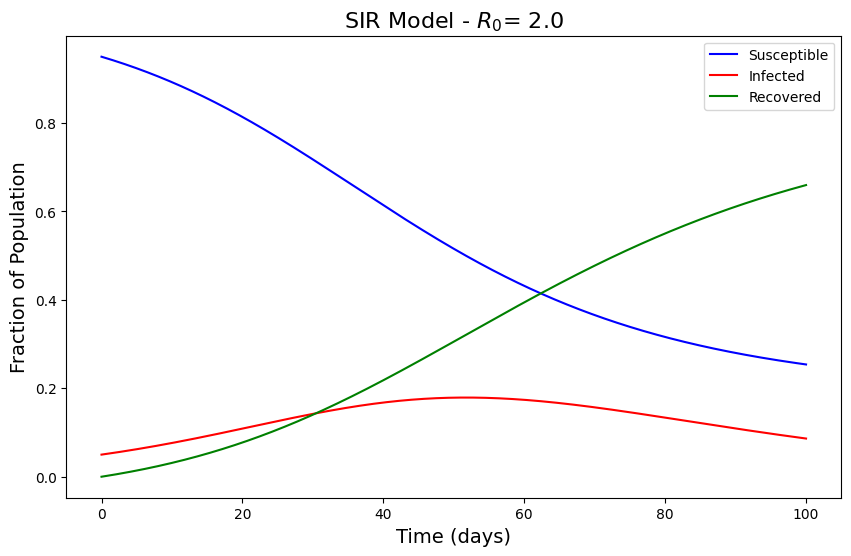

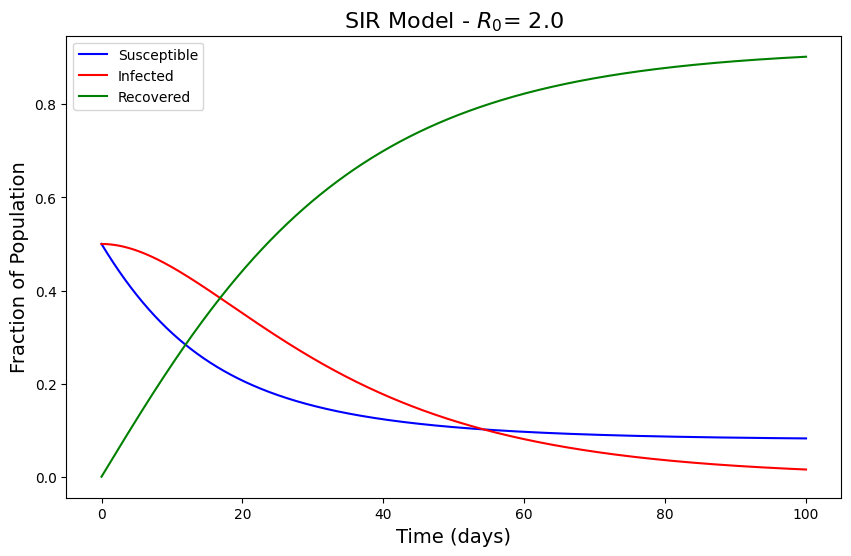

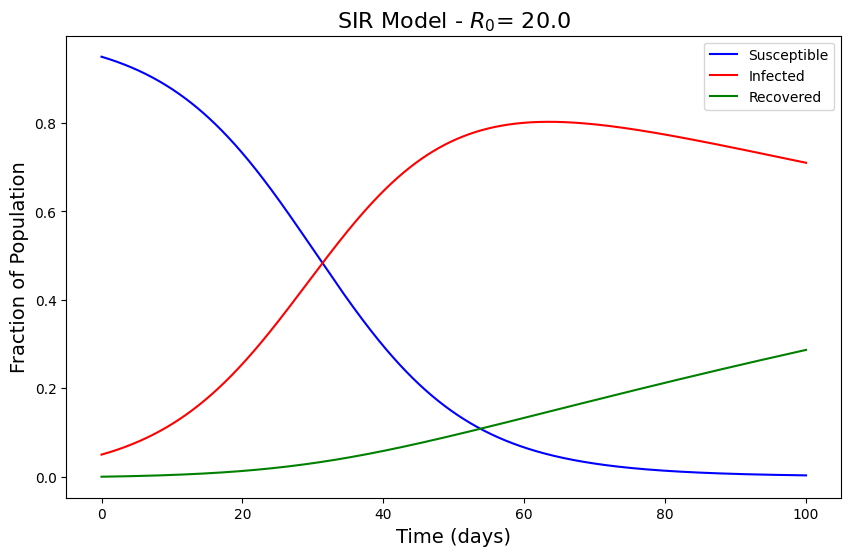

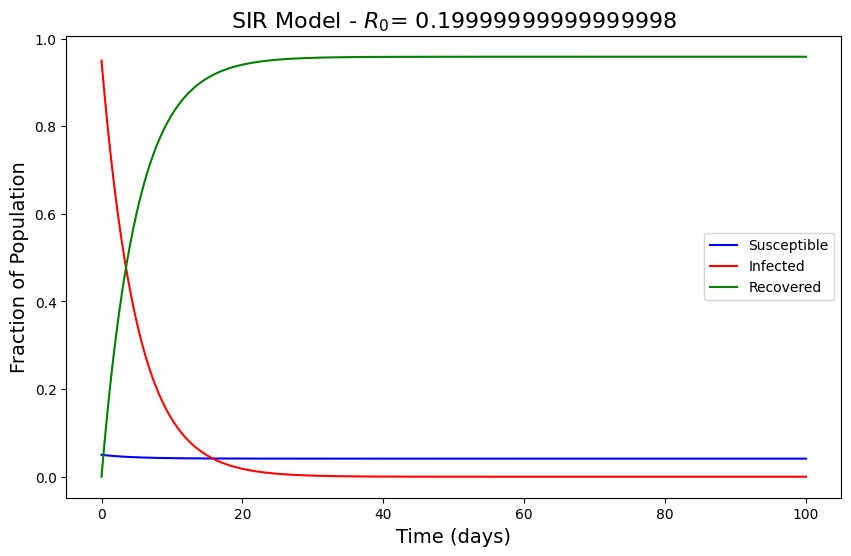

In [139]:
def SIRODE(intCon,t,  beta, gamma):
    s, i, r = intCon
    dsdt = -beta*i*s
    didt = beta*i*s - gamma*i
    drdt = gamma*i
    return dsdt, didt, drdt


def SIRModel(intCon, beta, gamma, startTime, endTime):
    t=np.linspace(startTime, endTime, (endTime - startTime)*100)
    solution = scipy.integrate.odeint(SIRODE, intCon, t, args=(beta, gamma))
    plt.figure(figsize=(10, 6))

    # Plot Susceptible, Infected, and Recovered
    plt.plot(t, solution[:, 0], label='Susceptible', color='blue')
    plt.plot(t, solution[:, 1], label='Infected', color='red')
    plt.plot(t, solution[:, 2], label='Recovered', color='green')

    # Adding labels and title
    plt.title(r"SIR Model - $R_0$" +f"= {beta/gamma}", fontsize=16)
    plt.xlabel('Time (days)', fontsize=14)
    plt.ylabel('Fraction of Population', fontsize=14)
    plt.legend(loc='best')

    # Show the plot
    plt.show()

SIRModel((0.95, 0.05, 0.0), 0.1, 0.05, 0, 100)
SIRModel((0.5, 0.5, 0.0), 0.1, 0.05, 0, 100)
SIRModel((0.95, 0.05, 0.0), 0.1, 0.005, 0, 100)
SIRModel((0.05, 0.95, 0.0), 0.04, 0.2, 0, 100)
    

### 3. Bouncing Ball (15 pts)
In a previous assignment, you looked at a ball thrown into the air
with initial velocity v0 from an initial height h, and tracked its vertical
position as it was falling under gravity, F = −mg. Using Newton’s
second law, F = ma, the equation of motion of the ball can be written
as a second order differential equation in the vertical position z:
md2z
dt2 = −mg
where g = 9.8m/s2.
(a) 5 points Set an initial height h, initial vertical velocity v0, and
solve the equation of motion of the ball using odeint. Choose a
time duration long enough so that you can see the ball go up into
the air, return to the ground, and keep going a little longer.Plot
vertical position z vs time t. Remember to label your axes, with
units, and give your graph a title.
(b) 10 points When you plotted the ball’s vertical position as a func-
tion of time, the ball kept going past the ground. In reality, this
would not happen - the ball would feel a force from the ground on
impact, and this force in turn would propel it back into the air.
How do we take this into account?
One possible model for the contact force is F = −kz−γv for z < 0.
This includes a spring-like force (proportional to k) and a damp-
ing force (proportional to the velocity with damping constant γ)
which allows for energy loss with each bounce. Add this into your
differential equation, and solve for a length of time long enough
so you can see at least two bounces. Note: this force should only
come into play when the ball is in contact with the ground, i.e.
when z < 0. Plot vertical position z vs time t. Remember to label
your axes, with units, and give your graph a title.
Use mass of the ball m = 0.3 kg, spring constant k = 1 × 103N/m
and damping coefficient γ = 1.0N s/m

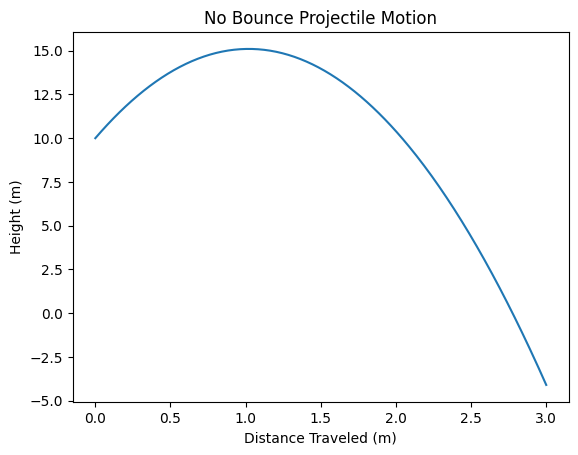

In [108]:
def posODEnoBounce(intCon, t, k = 1000, m=0.3, gamma = 1):
    z, v = intCon
    g=9.8
    dvdt = -g

    dzdt = v
    return dzdt, dvdt

def ballModelNoBounce(intCon, startTime, endTime, k=1000, m=0.3, gamma = 1):
    t = np.linspace(startTime, endTime, (endTime - startTime)*100)
    solution = scipy.integrate.odeint(posODEnoBounce, intCon, t, args=(k,m,gamma))
    plt.figure()
    plt.plot(t, solution[:, 0])
    plt.ylabel("Height (m)")
    plt.xlabel("Distance Traveled (m)")
    plt.title("No Bounce Projectile Motion")
    plt.show()

ballModelNoBounce((10, 10), 0, 3)

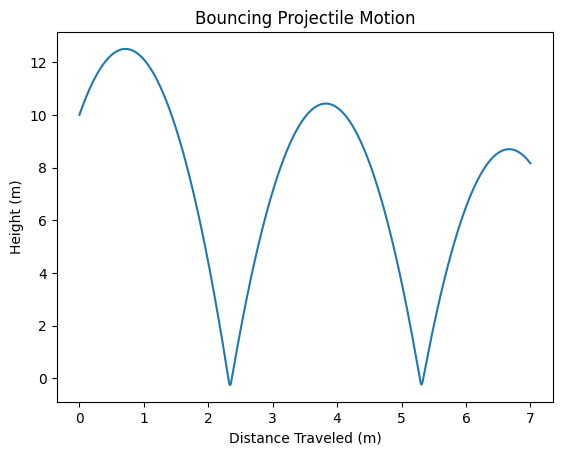

In [110]:
def posODE(intCon, t, k = 1000, m=0.3, gamma = 1):
    z, v = intCon
    g=9.8
    if z <= 0:
        dvdt = (-k*z - gamma * v)*(1/m)
    else:
        dvdt = -g

    dzdt = v
    return dzdt, dvdt

def ballModel(intCon, startTime, endTime, k=1000, m=0.3, gamma = 1):
    t = np.linspace(startTime, endTime, (endTime - startTime)*100)
    solution = scipy.integrate.odeint(posODE, intCon, t, args=(k,m,gamma))
    plt.figure()
    plt.plot(t, solution[:, 0])
    plt.ylabel("Height (m)")
    plt.xlabel("Distance Traveled (m)")
    plt.title("Bouncing Projectile Motion")
    plt.show()

ballModel((10, 7), 0, 7)

#### 4. Driven, Damped, Nonlinear Pendulum (25 pts)
The equation of motion for a damped, driven, nonlinear pendulum of
length l is $$\frac{d^2 \theta}{dt^2} = \frac{-g}{l}\sin(\theta)-q\frac{d\theta}{dt}+F_D\sin(\Omega _Dt)$$
(Hint: $\frac{d\theta}{dt}=\omega$)

Set $\frac{g}{l}=1$, $\Delta t=0.01$, $q=0.5$, $\Omega _D = \frac{2}{3}$.

(a) (10 points) Compute and plot $\theta (t)$ and $\omega (t)$ over the range $0s < t< 100s$ on the same graph with initial conditions at $t = 0$ of
$\theta(0) = 0.2 rad$, $\omega(0) = 0 \frac{rad}{s}$. Do this for three different values
of the driving force amplitude $F_D = 0, 0.5, 1.2$. Use legends.

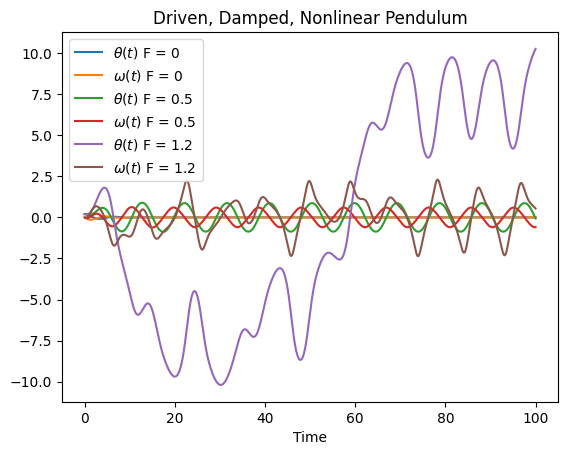

In [147]:
def dampedODE(intCon, t, gl, q, OMEGA, F):
    theta, omega = intCon
    dthetadt = omega
    domegadt = -(gl)*np.sin(theta)-q*omega+F*np.sin(OMEGA * t)
    return dthetadt, domegadt

def dampedSolver(intCon, l, q, OMEGA, F, start, end, stepSize):
    gl = 9.8/l
    t = np.linspace(start, end, (end-start)*stepSize)
    solution = scipy.integrate.odeint(dampedODE, intCon, t, args = (gl,q,OMEGA,F))
    return t, solution

def dampedPlot(intCon, l, q, OMEGA, F, start, end, stepSize):
    plt.figure()
    for i in F:
        t, solution = dampedSolver(intCon, l, q, OMEGA, i, start, end, stepSize)
        plt.plot(t, solution[:,0], label = fr"$\theta (t)$ F = {i}")
        plt.plot(t, solution[:, 1], label = fr"$\omega (t)$ F = {i}")
        plt.xlabel("Time")
        plt.title("Driven, Damped, Nonlinear Pendulum")
    plt.legend()
    plt.show()

dampedPlot((0.2, 0), 9.8, 0.5, 2/3, (0, 0.5, 1.2), 0, 100, 100)

(b) (5 points) Next, adjust your angle so that it falls between $-\pi$ and
$\pi$. To do this, make the following adjustment: if $\theta > \pi$, then
$\theta \rightarrow \theta - 2\pi$, else if $\theta < -\pi$, then $\theta \rightarrow \theta + 2\pi$. Plot $\theta$ vs time for
the previous three values of $F_D$, on the same plot (use legends).
In a markdown cell, describe the changes in the plots.

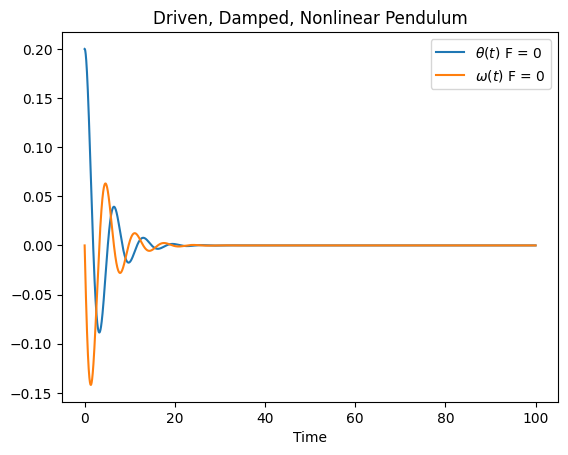

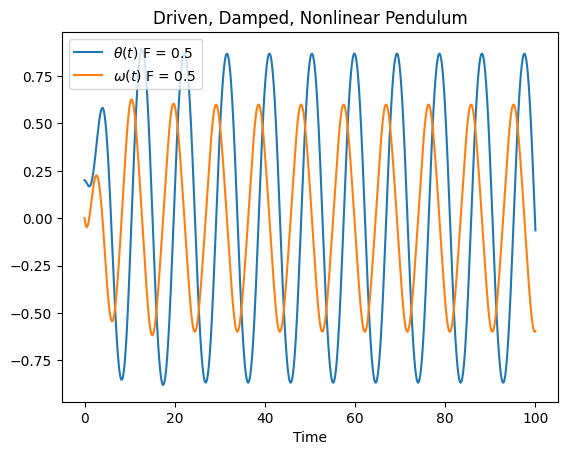

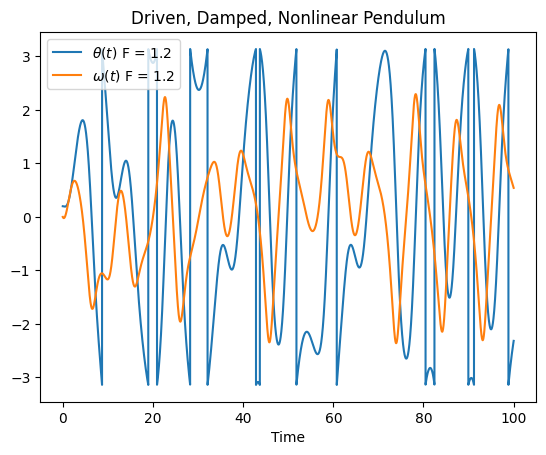

In [148]:
def wrap_angle(theta_array):
    return (theta_array + np.pi) % (2 * np.pi) - np.pi

def dampedSolver2(intCon, l, q, OMEGA, F, start, end, stepSize):
    gl = 9.8 / l
    t = np.linspace(start, end, int((end - start) * stepSize))
    solution = scipy.integrate.odeint(dampedODE, intCon, t, args=(gl, q, OMEGA, F))
    solution[:, 0] = wrap_angle(solution[:, 0])  # Wrap theta only
    return t, solution


def dampedPlot2(intCon, l, q, OMEGA, F, start, end, stepSize):
    plt.figure()
    t, solution = dampedSolver2(intCon, l, q, OMEGA, F, start, end, stepSize)
    plt.plot(t, solution[:,0], label = fr"$\theta (t)$ F = {F}")
    plt.plot(t, solution[:, 1], label = fr"$\omega (t)$ F = {F}")
    plt.xlabel("Time")
    plt.title("Driven, Damped, Nonlinear Pendulum")
    plt.legend()
    plt.show()
#(0, 0.5, 1.2)
dampedPlot2((0.2, 0), 9.8, 0.5, 2/3, 0, 0, 100, 100)
dampedPlot2((0.2, 0), 9.8, 0.5, 2/3, 0.5, 0, 100, 100)
dampedPlot2((0.2, 0), 9.8, 0.5, 2/3, 1.2, 0, 100, 100)

(c) (5 points) Repeat for a second pendulum (i.e. define a new $\theta$ and
$\omega$) . Keep everything the same, except change the starting value
of the angle: $\theta _2(0) = 0.21 rad$. Plot old and new on the same
graph for the same set of plots as in part 4a.

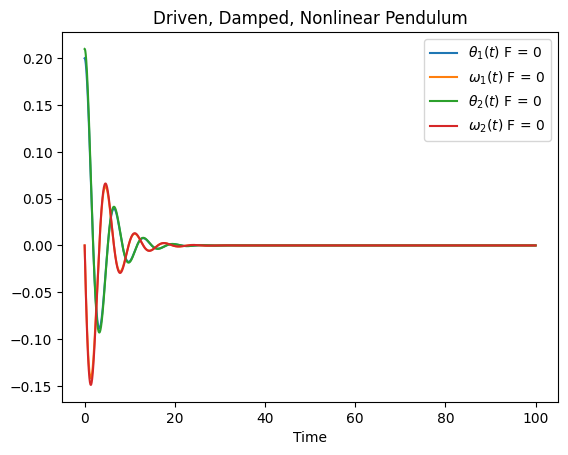

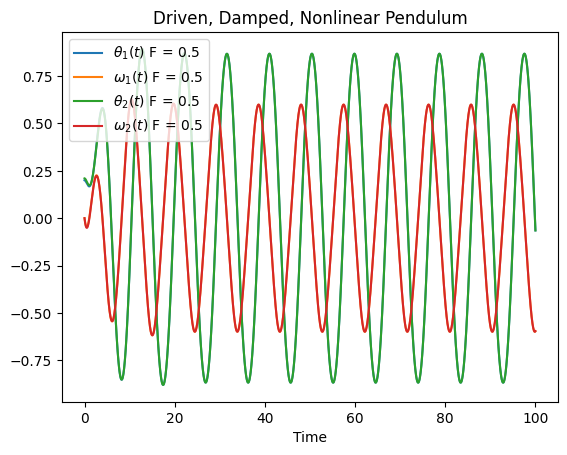

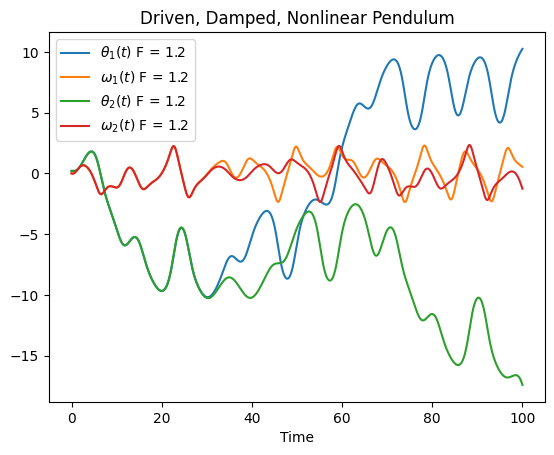

In [149]:
def dampedPlot3(intCon, l, q, OMEGA, F, start, end, stepSize, count):
    t, solution = dampedSolver(intCon, l, q, OMEGA, F, start, end, stepSize)
    plt.plot(t, solution[:,0], label = fr"$\theta _{count} (t)$ F = {F}")
    plt.plot(t, solution[:, 1], label = fr"$\omega _{count}(t)$ F = {F}")
    plt.xlabel("Time")
    plt.title("Driven, Damped, Nonlinear Pendulum")
    plt.legend()

plt.figure()
dampedPlot3((0.2, 0), 9.8, 0.5, 2/3, 0, 0, 100, 100, 1)
dampedPlot3((0.21, 0), 9.8, 0.5, 2/3, 0, 0, 100, 100, 2)
plt.show()

plt.figure()
dampedPlot3((0.2, 0), 9.8, 0.5, 2/3, 0.5, 0, 100, 100, 1)
dampedPlot3((0.21, 0), 9.8, 0.5, 2/3, 0.5, 0, 100, 100, 2)
plt.show()

plt.figure()
dampedPlot3((0.2, 0), 9.8, 0.5, 2/3, 1.2, 0, 100, 100, 1)
dampedPlot3((0.21, 0), 9.8, 0.5, 2/3, 1.2, 0, 100, 100, 2)
plt.show()


(d) (5 points) Plot $\Delta \theta (t) = \theta _1(t) - \theta _2(t)$ as a function of time for all
three values of $F_D$ on the same graph (use legends). How does the
strength of the driving change the time dependence of the angle?

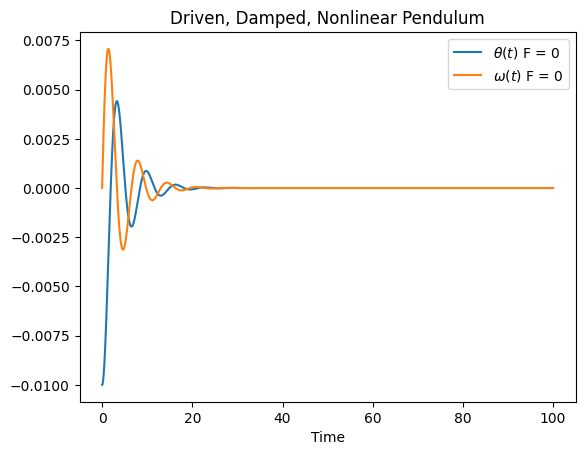

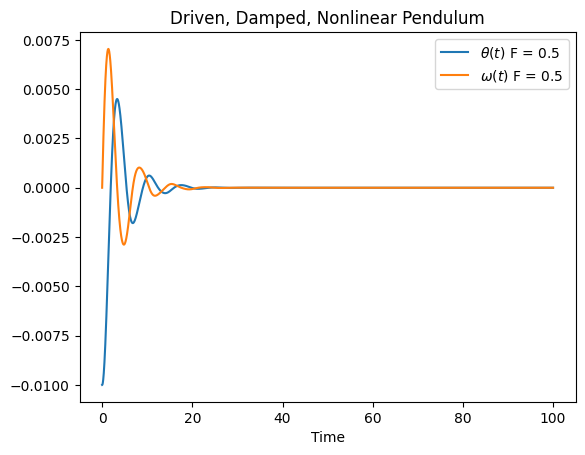

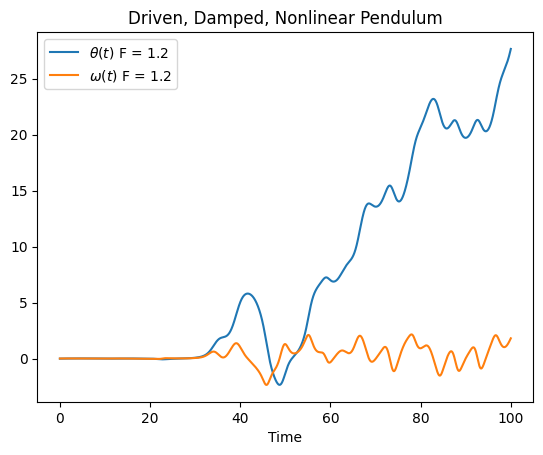

In [154]:
def dampedPlot4(intCon1, intCon2, l, q, OMEGA, F, start, end, stepSize):
    t, solution1 = dampedSolver(intCon1, l, q, OMEGA, F, start, end, stepSize)
    _, solution2 = dampedSolver(intCon2, l, q, OMEGA, F, start, end, stepSize)
    solution = solution1 - solution2
    plt.figure()
    plt.plot(t, solution[:,0], label = fr"$\theta (t)$ F = {F}")
    plt.plot(t, solution[:, 1], label = fr"$\omega (t)$ F = {F}")
    plt.xlabel("Time")
    plt.title("Driven, Damped, Nonlinear Pendulum")
    plt.legend()
    plt.show()

dampedPlot4((0.2, 0), (0.21, 0), 9.8, 0.5, 2/3, 0, 0, 100, 100)
dampedPlot4((0.2, 0), (0.21, 0), 9.8, 0.5, 2/3, 0.5, 0, 100, 100)
dampedPlot4((0.2, 0), (0.21, 0), 9.8, 0.5, 2/3, 1.2, 0, 100, 100)

#### 5. Solving an ODE with odeint: The low-pass filter. (20 pts)
The circuit
shown in the attached figure built from a resistor R and a capacitor C
is called a “low-pass filter”. The input voltage $V_{in}(t)$ is specified. Then
the output voltage $V_{out}(t)$ is determined by the following first-order
ODE:
$$\frac{dV_{out}(t)}{dV_{in}(t)} = \frac{V_{in}(t) - V_{out}(t)}{RC}$$
This is called a low-pass filter because low-frequency sine waves with
angular frequencies $\omega \ll \frac{1}{RC}$ pass through this circuit nearly unchanged, while high frequency sine waves with $\omega \gg \frac{1}{RC}$ are (imperfectly) blocked. For this problem use $R = 10 k\Omega$, $C = 1 \mu F$ which gives
$\frac{1}{RC} = 100 \frac{rad}{s}$.

(a) (5 points) Assume $V_{in}(t) = A \sin(\omega t)$ with $A = 2.0 V$ and $\omega =50 \frac{rad}{s}$. Define a function to compute $V_{in}(t)$ and use this function
to make a plot of $V_{in}(t)$ for $0 < t < t_{max}$, with $t_{max}$ chosen to show
about two or three complete cycles of the sine wave. Make the
number of time points a variable that you can easily change. Start
with several hundred points to get a nice smooth curve.

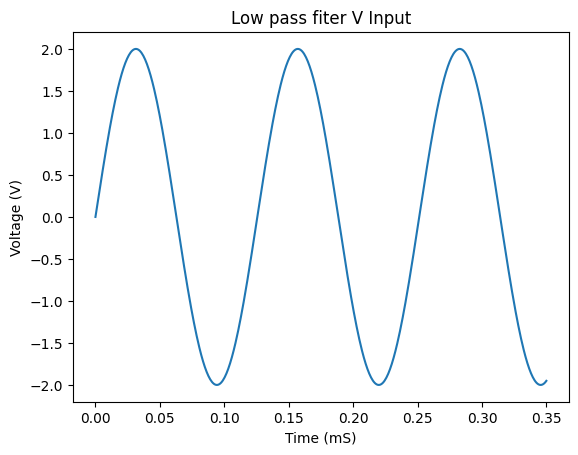

In [194]:
def vIn(t, omega = 50, A = 2):
    return A*np.sin(omega*t)

def vInPlot(tMin, tMax, omega = 50, A = 2, scalingFactor = 0):
    if scalingFactor == 0:
        T = np.linspace(tMin, tMax, (tMax - tMin)**2)
    else:
        T = np.linspace(tMin, tMax, scalingFactor)
    V = vIn(T)
    plt.figure()
    plt.plot(T, V)
    plt.xlabel("Time (mS)")
    plt.ylabel("Voltage (V)")
    plt.title("Low pass fiter V Input")
    plt.show()

vInPlot(0, 0.35, scalingFactor = 500)

(b) (5 points) Write a program to that uses odeint to find $V_{out}(t)$ at the
same set of time points. Use the initial condition $V_{out}(0) = 0.0 V$.
Plot $V_{in}(t)$ and $V_{out}(t)$ on the same graph (with labeled axes and a
legend for the two curves). Because $\omega < \frac{R}{C}$ , the output should
be only a little bit smaller than the input and slightly shifted in
phase.

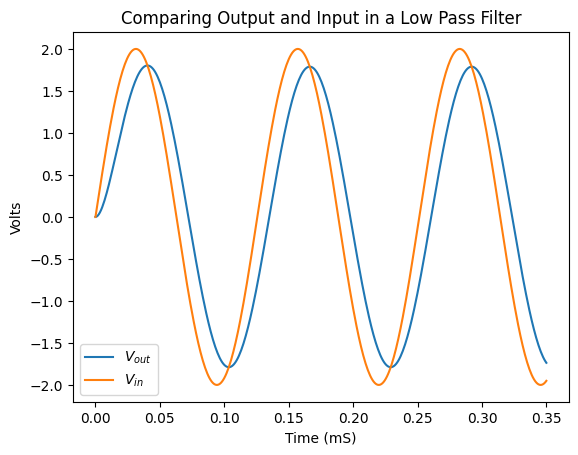

In [197]:
def lowPassOde(vOut, t, R, C, omega, A):
    Vin_t = vIn(t, omega, A)
    dVoutdt = (Vin_t - vOut) / (R * C)
    return dVoutdt

def lowPassSolver(intCon, R, C, tMin, tMax, omega1 = 50, A1 = 2, scalingFactor = 0):
    if scalingFactor == 0:
        T = np.linspace(tMin, tMax, (tMax - tMin)**2)
    else:
        T = np.linspace(tMin, tMax, scalingFactor)
    solution = scipy.integrate.odeint(lowPassOde, intCon, T, args = (R, C, omega1, A1))
    V = vIn(T, omega1, A1)
    return T, V, solution

def lowPassPlot(intCon, R, C, tMin, tMax, omega = 50, A = 2, scalingFactor1 = 0):
    T, V, solution = lowPassSolver(intCon, R, C, tMin, tMax, omega1 = omega, A1 = A, scalingFactor = scalingFactor1)
    plt.figure()
    plt.plot(T, solution[:, 0], label = r"$V_{out}$")
    plt.plot(T, V, label = r"$V_{in}$")
    plt.xlabel("Time (mS)")
    plt.ylabel("Volts")
    plt.title("Comparing Output and Input in a Low Pass Filter")
    plt.legend()
    plt.show()

lowPassPlot(0, 10e3, 1e-6, 0, 0.35, scalingFactor1 = 400)


(c) (5 points) Run your program again, changing ω to 300 rad/s.
Now the output should be quite a bit smaller than the input, and
shifted in phase by nearly π/2. For both values of ω you should
find that Vout(t) is a sine wave except for an initial transient near
t = 0.

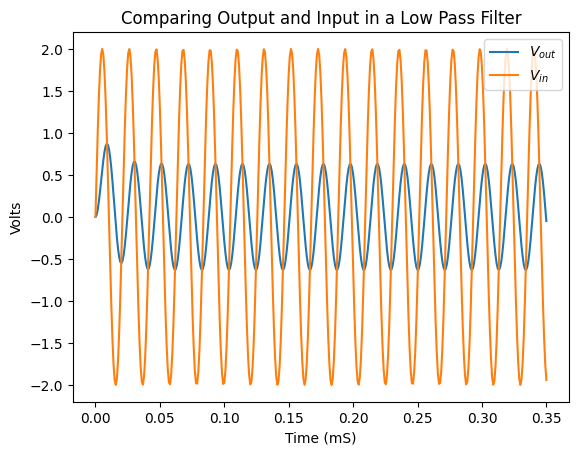

In [198]:
lowPassPlot(0, 10e3, 1e-6, 0, 0.35, scalingFactor1 = 400, omega = 300)

(d) (5 points) How would you modify the circuit to get a high-pass
filter? Answer in a markdown cell.

To modify this to be a high pass filter you just need to swap the order of the capacitor and the resistor. This effectively flips the differential equation.

#### 6. Projectile motion (10 points) 
This returns to a problem you did
earlier in the semester, but using the differential equation version. For
a mass m launched with initial velocity $v_0$ at angle $\theta$ with gravitational
acceleration g, Newton’s second law of motion ($\vec{F} = m\vec{a}$) for its position
$\vec{r} = x\hat{i} + y\hat{j}$ is

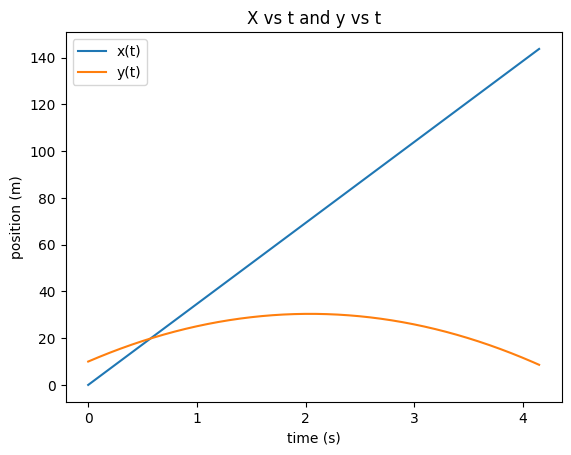

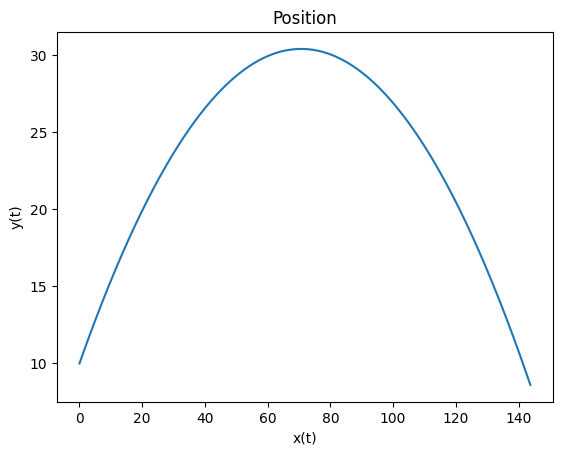

In [200]:
def projODE(intCon, t, m, fx, fy):
    x, y, vx, vy = intCon
    dxdt = vx
    dydt = vy
    dvxdt = fx/m
    dvydt = fy/m
    return dxdt, dydt, dvxdt, dvydt

def projSolver(intCon, t, m, fx, fy):
    solution = scipy.integrate.odeint(projODE, intCon, t, args = (m, fx, fy))
    return solution

def projPlot(intCon, m, fx, fy):
    t=np.linspace(0, 4.15, 500)
    solution = projSolver(intCon, t, m, fx, fy)
    plt.figure()
    plt.plot(t, solution[:, 0], label = 'x(t)')
    plt.plot(t, solution[:, 1], label = 'y(t)')
    plt.legend()
    plt.xlabel('time (s)')
    plt.ylabel('position (m)')
    plt.title('X vs t and y vs t')
    plt.show()

    plt.figure()
    plt.plot(solution[:, 0], solution[:, 1])
    plt.xlabel('x(t)')
    plt.ylabel("y(t)")
    plt.title("Position")
    plt.show()

projPlot((0, 10, 40*np.cos(np.radians(30)), 40*np.sin(np.radians(30))), 0.3, 0, -0.3*9.8)

gravity independent mass, so is graph mg/m = g = a

8 (a) (5 points) Using Newton’s second law, write an expression to find
the orbital speed that the satellite needs in order to maintain a
circular orbit at a height of h = 500 km. Note that, for what
follows, it is important to make your calculation using at least 5
significant figures - we need a highly-accurate orbital speed in or-
der to see relevant changes to the orbit on the order of kilometers.
Put this into your code.

In [221]:
G = 6.6743e-11
M_earth = 5.9722e24 
R_earth = 6.3781e6
m_sat = 10000 
h = 500e3  

r = R_earth + h 
vSat = np.sqrt(G * M_earth / r) 
print(f"The speed of the satellite is {vSat:.3f} m/s")

The speed of the satellite is 7612.649 m/s


(b) (5 points) Divide your equations of motion into four first order
equations in (x, y) positions and velocities, and write code to
calculate all four as a function of time for an initial position and
velocity consistent with the orbit given in part (a).

In [226]:
def satODE(intCon, t): 
    x, y, vx, vy = intCon
    r = np.sqrt(x**2 + y**2)
    dvxdt = -G * M_earth * x / r**3
    dvydt = -G * M_earth * y / r**3
    return vx, vy, dvxdt, dvydt


intCon = (r, 0, 0, vSat)

(c) (5 points) For a duration corresponding to 5 complete orbits, make
two plots: the altitude (height above the earths surface, in km) of
the satellite as a function of time (in minutes or hours); and the
y position as a function of x-position.

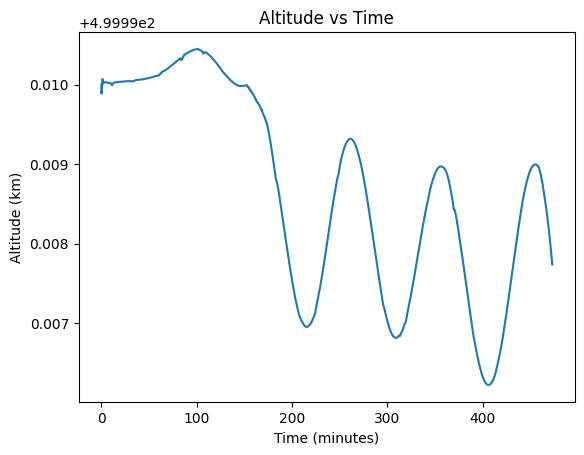

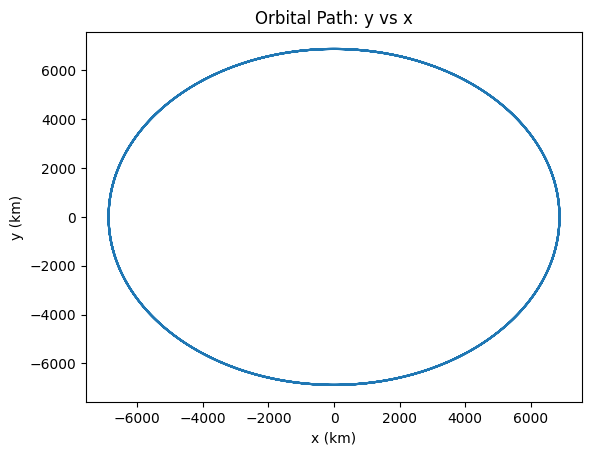

In [231]:
period = 2 * np.pi * r / vSat
t = np.linspace(0, 5 * period, int(25 * period))
sol = scipy.integrate.odeint(satODE, intCon, t)

x, y, vx, vy = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

alt = (np.sqrt(x**2 + y**2) - R_earth) / 1000


t_min = t / 60

plt.figure()

plt.plot(t_min, alt)
plt.title("Altitude vs Time")
plt.xlabel("Time (minutes)")
plt.ylabel("Altitude (km)")

plt.show()

plt.plot(x / 1000, y / 1000)
plt.title("Orbital Path: y vs x")
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.show()
